In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [12]:
data_cinema_tickets = pd.read_csv('arrived_data/cinemaTicket_Ref.csv')
data_cinema_tickets.head(2)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5


# EDA

In [14]:
data_cinema_tickets['date'] = pd.to_datetime(data_cinema_tickets['date'])

In [15]:
data_cinema_tickets.dtypes

film_code                int64
cinema_code              int64
total_sales              int64
tickets_sold             int64
tickets_out              int64
show_time                int64
occu_perc              float64
ticket_price           float64
ticket_use               int64
capacity               float64
date            datetime64[ns]
month                    int64
quarter                  int64
day                      int64
dtype: object

In [ ]:
data_cinema_tickets['']

In [135]:
data_for_creation_series = data_cinema_tickets

In [136]:
data_for_creation_series['year'] = data_for_creation_series.date.dt.year

In [137]:
data_for_creation_series
data_for_creation_series['day_of_week'] = data_for_creation_series.date.dt.dayofweek

In [138]:
data_for_creation_series

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year,day_of_week
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,2018,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,2018,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,2018,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,2018,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4,2018,6
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4,2018,6
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4,2018,6
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4,2018,6


In [139]:
data_for_creation_series.day_of_week.unique()

array([5, 4, 3, 2, 6, 1, 0], dtype=int64)

In [140]:
data_for_creation_series['weekend'] = 0
data_for_creation_series.loc[(data_for_creation_series.day_of_week == 5) | (data_for_creation_series.day_of_week == 6), 'weekend'] = 1

In [141]:
data_for_creation_series

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year,day_of_week,weekend
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,2018,5,1
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,2018,5,1
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,2018,5,1
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,2018,5,1
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,2018,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4,2018,6,1
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4,2018,6,1
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4,2018,6,1
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4,2018,6,1


In [ ]:
#como esse preço varia ? 
#o quanto ele impacta na ocupação ? 
#o quanto ele impacta nas vendas? 
#quem impacta mais , o preço ou o dia ?


In [179]:
data_of_prices = data_for_creation_series[['film_code','tickets_sold','ticket_price','date','weekend','month']]

In [180]:
data_of_prices['name_of_day_week']=data_of_prices.date.dt.strftime('%A')

C:\Users\hop\AppData\Local\Temp\ipykernel_34892\2944635563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_of_prices['name_of_day_week']=data_of_prices.date.dt.strftime('%A')


In [181]:
data_of_prices

,film_code,tickets_sold,ticket_price,date,weekend,month,name_of_day_week
0,1492,26,150000.0,2018-05-05,1,5,Saturday
1,1492,42,80000.0,2018-05-05,1,5,Saturday
2,1492,32,80000.0,2018-05-05,1,5,Saturday
3,1492,12,100000.0,2018-05-05,1,5,Saturday
4,1492,15,80000.0,2018-05-05,1,5,Saturday
...,...,...,...,...,...,...,...
142519,1569,22,60000.0,2018-11-04,1,11,Sunday
142520,1569,15,80000.0,2018-11-04,1,11,Sunday
142521,1569,8,132500.0,2018-11-04,1,11,Sunday
142522,1569,5,120000.0,2018-11-04,1,11,Sunday


<AxesSubplot:xlabel='date'>

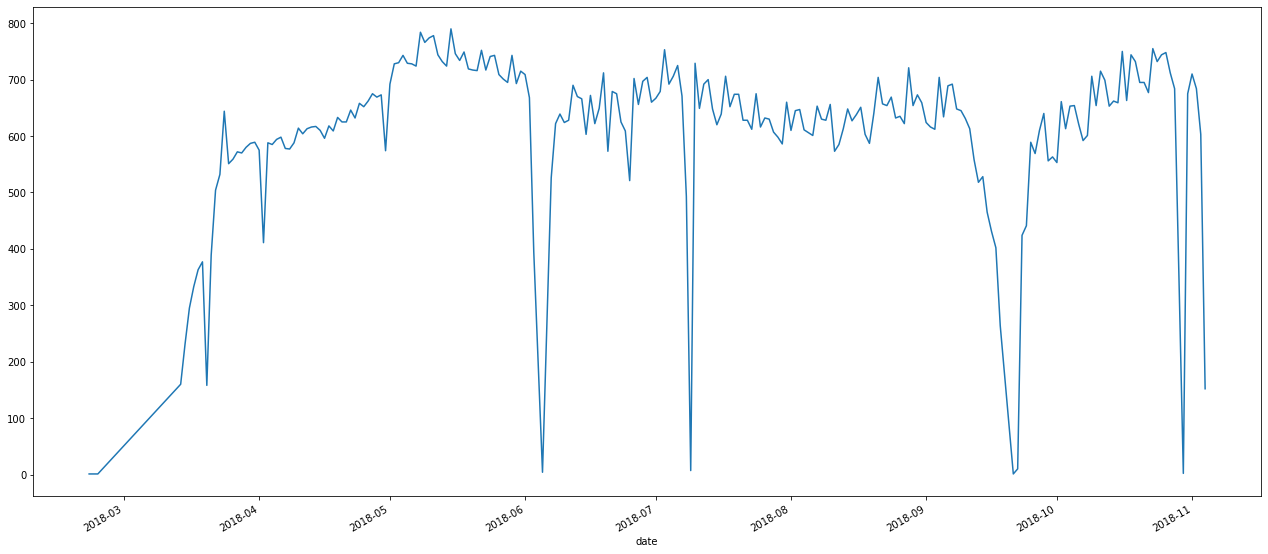

In [207]:
plt.figure(figsize=(22,10))
data_of_prices.groupby(['date'])['tickets_sold'].count().plot()

<AxesSubplot:xlabel='date'>

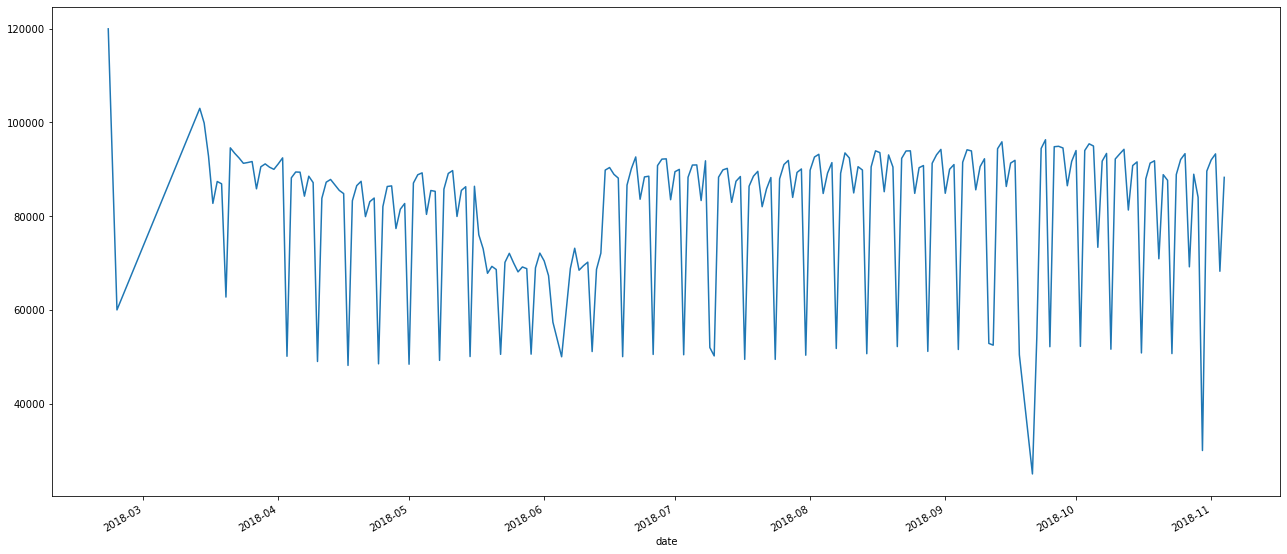

In [206]:
plt.figure(figsize=(22,10))
data_of_prices.groupby('date')['ticket_price'].mean().plot()